# Estimating Proportions

Think Bayes, Second Edition

Copyright 2020 Allen B. Downey

License: [Attribution-NonCommercial-ShareAlike 4.0 International (CC BY-NC-SA 4.0)](https://creativecommons.org/licenses/by-nc-sa/4.0/)

http://allendowney.github.io/ThinkBayes2/chap03.html

In [1]:
# If we're running on Colab, install empiricaldist
# https://pypi.org/project/empiricaldist/

import sys
IN_COLAB = 'google.colab' in sys.modules

if IN_COLAB:
    !pip install empiricaldist

In [2]:
# Get utils.py

from os.path import basename, exists

def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve
        local, _ = urlretrieve(url, filename)
        print('Downloaded ' + local)
    
download('https://github.com/AllenDowney/ThinkBayes2/raw/master/soln/utils.py')

In [3]:
from utils import set_pyplot_params
set_pyplot_params()

In the previous chapter we solved the 101 Bowls Problem, and I admitted that it is not really about guessing which bowl the cookies came from; it is about estimating proportions.

In this chapter, we take another step toward Bayesian statistics by solving the Euro problem.
We'll start with the same prior distribution, and we'll see that the update is the same, mathematically.
But I will argue that it is a different problem, philosophically, and use it to introduce two defining elements of Bayesian statistics: choosing prior distributions, and using probability to represent the unknown.

在上一章中，我们解决了 101 碗问题，我承认这并不是要猜测饼干来自哪个碗；这是关于估计比例。

在本章中，我们通过解决欧元问题向贝叶斯统计又迈出了一步。
我们将从相同的先验分布开始，我们会看到更新在数学上是相同的。
但我会争辩说，从哲学上讲，这是一个不同的问题，并用它来介绍贝叶斯统计的两个定义要素：选择先验分布和使用概率来表示未知数。

## The Euro Problem

In *Information Theory, Inference, and Learning Algorithms*, David MacKay poses this problem:

"A statistical statement appeared in *The Guardian* on Friday January 4, 2002:

> When spun on edge 250 times, a Belgian one-euro coin came up heads 140 times and tails 110.  \`It looks very suspicious to me,' said Barry Blight, a statistics lecturer at the London School of Economics.  \`If the coin were unbiased, the chance of getting a result as extreme as that would be less than 7%.'

"But [MacKay asks] do these data give evidence that the coin is biased rather than fair?"

To answer that question, we'll proceed in two steps.
First we'll use the binomial distribution to see where that 7% came from; then we'll use Bayes's Theorem to estimate the probability that this coin comes up heads.

## 欧元问题

在 *Information Theory, Inference, and Learning Algorithms* 中，David MacKay 提出了这个问题：

“2002 年 1 月 4 日星期五，*《卫报》* 发表了一份统计声明：

> 一枚比利时一欧元硬币在边缘旋转 250 次时，正面朝上 140 次，反面朝上 110 次。“在我看来，这很可疑，”伦敦经济学院的统计讲师巴里·布莱特 (Barry Blight) 说。 \`如果硬币没有偏见，那么得到如此极端结果的机会将低于 7%。

“但 [MacKay 问道] 这些数据是否证明硬币存在偏见而不是公平？”

为了回答这个问题，我们将分两步进行。
首先，我们将使用二项分布来查看这 7% 的来源；然后我们将使用贝叶斯定理来估计这枚硬币正面朝上的概率。


## The Binomial Distribution

Suppose I tell you that a coin is "fair", that is, the probability of heads is 50%.  If you spin it twice, there are four outcomes: `HH`, `HT`, `TH`, and `TT`.  All four outcomes have the same probability, 25%.

If we add up the total number of heads, there are three possible results: 0, 1, or 2.  The probabilities of 0 and 2 are 25%, and the probability of 1 is 50%.

More generally, suppose the probability of heads is $p$ and we spin the coin $n$ times.  The probability that we get a total of $k$ heads is given by the [binomial distribution](https://en.wikipedia.org/wiki/Binomial_distribution):

$$\binom{n}{k} p^k (1-p)^{n-k}$$

for any value of $k$ from 0 to $n$, including both.
The term $\binom{n}{k}$ is the [binomial coefficient](https://en.wikipedia.org/wiki/Binomial_coefficient), usually pronounced "n choose k".

We could evaluate this expression ourselves, but we can also use the SciPy function `binom.pmf`.
For example, if we flip a coin `n=2` times and the probability of heads is `p=0.5`, here's the probability of getting `k=1` heads:

## 二项分布

假设我告诉你一枚硬币是“公平的”，即正面朝上的概率是 50%。如果你旋转它两次，有四种结果：`HH`、`HT`、`TH`和`TT`。所有四种结果的概率相同，均为 25%。

如果我们把正面的总数加起来，有三种可能的结果：0、1 或 2。0 和 2 的概率是 25%，1 的概率是 50%。

更一般地，假设正面朝上的概率是 $p$，我们将硬币旋转 $n$ 次。 [二项分布]（https://en.wikipedia.org/wiki/Binomial_distribution）给出了我们一共得到 $k$ 个正面的概率：

$$\binom{n}{k} p^k (1-p)^{n-k}$$

对于从 0 到 $n$ 的任何 $k$ 值，包括两者。
术语 $\binom{n}{k}$ 是 [二项式系数]（https://en.wikipedia.org/wiki/Binomial_coefficient），通常发音为“n 选择 k”。

我们可以自己评估这个表达式，但我们也可以使用 SciPy 函数 `binom.pmf`。
例如，如果我们掷硬币“n=2”次，正面朝上的概率是“p=0.5”，那么得到“k=1”正面的概率如下：

In [5]:
from scipy.stats import binom

n = 2
p = 0.5
k = 1

binom.pmf(k, n, p)

0.5000000000000002

Instead of providing a single value for `k`, we can also call `binom.pmf` with an array of values.

除了为 `k` 提供单个值之外，我们还可以使用一组值调用 `binom.pmf`。

In [7]:
import numpy as np
ks = np.arange(n+1)
ps = binom.pmf(ks, n, p)
ps

array([0.25, 0.5 , 0.25])

The result is a NumPy array with the probability of 0, 1, or 2 heads.
If we put these probabilities in a `Pmf`, the result is the distribution of `k` for the given values of `n` and `p`.

Here's what it looks like:

结果是一个具有 0、1 或 2 个正面概率的 NumPy 数组。
如果我们将这些概率放在“Pmf”中，则结果是“k”对于给定的“n”和“p”值的分布。

这是它的样子：

In [8]:
from empiricaldist import Pmf

pmf_k = Pmf(ps, ks)
pmf_k

,probs
0,0.25
1,0.50
2,0.25


The following function computes the binomial distribution for given values of `n` and `p` and returns a `Pmf` that represents the result.

以下函数计算给定“n”和“p”值的二项分布，并返回代表结果的“Pmf”。

In [13]:
def make_binomial(n, p):
    """Make a binomial Pmf."""
    ks = np.arange(n+1)
    ps = binom.pmf(ks, n, p)
    return Pmf(ps, ks)

### 原来随机分布是这样算出来的


Here's what it looks like with `n=250` and `p=0.5`:

以下是 `n=250` 和 `p=0.5` 的样子：

In [10]:
pmf_k = make_binomial(n=250, p=0.5)

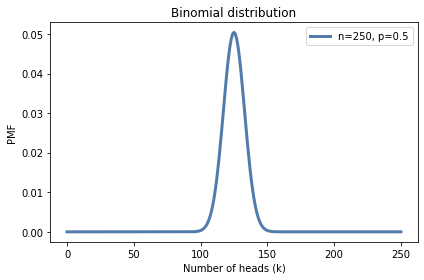

In [11]:
from utils import decorate

pmf_k.plot(label='n=250, p=0.5')

decorate(xlabel='Number of heads (k)',
         ylabel='PMF',
         title='Binomial distribution')

The most likely quantity in this distribution is 125:

此分布中最可能的数量是 125：

In [12]:
pmf_k.max_prob()

125

But even though it is the most likely quantity, the probability that we get exactly 125 heads is only about 5%.

但即使它是最可能的数量，我们恰好得到 125 个正面的概率也只有 5% 左右。

In [14]:
pmf_k[125]

0.050412213147309655

In MacKay's example, we got 140 heads, which is even less likely than 125:

在 MacKay 的示例中，我们得到了 140 个正面，这比 125 个更不可能：

In [16]:
pmf_k[140]

0.008357181724918204

In the article MacKay quotes, the statistician says, "If the coin were unbiased the chance of getting a result as extreme as that would be less than 7%."

We can use the binomial distribution to check his math.  The following function takes a PMF and computes the total probability of quantities greater than or equal to `threshold`. 

在麦凯引用的文章中，这位统计学家说：“如果硬币是公正的，那么得到极端结果的机会将低于 7%。”

我们可以使用二项分布来检查他的数学。以下函数采用 PMF 并计算数量大于或等于“阈值”的总概率。

In [20]:
Pmf.qs

In [17]:
def prob_ge(pmf, threshold):
    """Probability of quantities greater than threshold."""
    ge = (pmf.qs >= threshold)
    total = pmf[ge].sum()
    return total

Here's the probability of getting 140 heads or more:
这是获得 140 个或更多正面的概率：

In [18]:
prob_ge(pmf_k, 140)

0.03321057562002163

`Pmf` provides a method that does the same computation.
`Pmf` 提供了一种执行相同计算的方法。

In [19]:
pmf_k.prob_ge(140)

0.03321057562002163

The result is about 3.3%, which is less than the quoted 7%.  The reason for the difference is that the statistician includes all outcomes "as extreme as" 140, which includes outcomes less than or equal to 110.

To see where that comes from, recall that the expected number of heads is 125.  If we get 140, we've exceeded that expectation by 15.
And if we get 110, we have come up short by 15.

7% is the sum of both of these "tails", as shown in the following figure.

结果约为 3.3%，低于引用的 7%。造成差异的原因是统计学家包括了所有“极端”的结果 140，其中包括小于或等于 110 的结果。

要查看它的来源，请回想一下预期的正面数量是 125。如果我们得到 140，我们已经超出预期 15。
如果我们得到 110，我们就差了 15 个。

7%是这两个“尾巴”的总和，如下图所示。

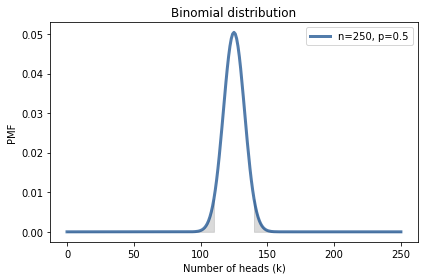

In [21]:
import matplotlib.pyplot as plt

def fill_below(pmf):
    qs = pmf.index
    ps = pmf.values
    plt.fill_between(qs, ps, 0, color='C5', alpha=0.4)

qs = pmf_k.index
fill_below(pmf_k[qs>=140])
fill_below(pmf_k[qs<=110])
pmf_k.plot(label='n=250, p=0.5')

decorate(xlabel='Number of heads (k)',
         ylabel='PMF',
         title='Binomial distribution')

Here's how we compute the total probability of the left tail.

In [22]:
pmf_k.prob_le(110)

0.03321057562002164

The probability of outcomes less than or equal to 110 is also 3.3%,
so the total probability of outcomes "as extreme" as 140 is 6.6%.

The point of this calculation is that these extreme outcomes are unlikely if the coin is fair.

That's interesting, but it doesn't answer MacKay's question.  Let's see if we can.

结果小于或等于110的概率也是3.3%，
所以结果“极端”为 140 的总概率为 6.6%。

这个计算的重点是，如果硬币是公平的，这些极端结果是不可能的。

这很有趣，但它没有回答 MacKay 的问题。让我们看看我们是否可以。

## Bayesian Estimation

Any given coin has some probability of landing heads up when spun
on edge; I'll call this probability `x`.
It seems reasonable to believe that `x` depends
on physical characteristics of the coin, like the distribution
of weight.
If a coin is perfectly balanced, we expect `x` to be close to 50%, but
for a lopsided coin, `x` might be substantially different.
We can use Bayes's theorem and the observed data to estimate `x`.

For simplicity, I'll start with a uniform prior, which assumes that all values of `x` are equally likely.
That might not be a reasonable assumption, so we'll come back and consider other priors later.

We can make a uniform prior like this:

## 贝叶斯估计

任何给定的硬币在旋转时都有一定的概率正面朝上
边缘;我将这个概率称为“x”。
相信 `x` 取决于
关于硬币的物理特性，例如分布
的重量。
如果硬币完全平衡，我们预计“x”接近 50%，但
对于不平衡的硬币，`x` 可能有很大的不同。
我们可以使用贝叶斯定理和观察到的数据来估计“x”。

为简单起见，我将从一个统一的先验开始，它假设“x”的所有值都具有相同的可能性。
这可能不是一个合理的假设，所以我们稍后会回来考虑其他先验。

我们可以像这样制作一个统一的先验：

In [23]:
hypos = np.linspace(0, 1, 101)
prior = Pmf(1, hypos)

In [35]:
prior.head()

,probs
0.00,1
0.01,1
0.02,1


`hypos` is an array of equally spaced values between 0 and 1.

We can use the hypotheses to compute the likelihoods, like this:

`hypos` 是 0 到 1 之间等距值的数组。

我们可以使用假设来计算可能性，如下所示：

In [27]:
likelihood_heads = hypos
likelihood_tails = 1 - hypos

In [31]:
likelihood_heads

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99, 1.  ])

In [32]:
likelihood_tails

array([1.  , 0.99, 0.98, 0.97, 0.96, 0.95, 0.94, 0.93, 0.92, 0.91, 0.9 ,
       0.89, 0.88, 0.87, 0.86, 0.85, 0.84, 0.83, 0.82, 0.81, 0.8 , 0.79,
       0.78, 0.77, 0.76, 0.75, 0.74, 0.73, 0.72, 0.71, 0.7 , 0.69, 0.68,
       0.67, 0.66, 0.65, 0.64, 0.63, 0.62, 0.61, 0.6 , 0.59, 0.58, 0.57,
       0.56, 0.55, 0.54, 0.53, 0.52, 0.51, 0.5 , 0.49, 0.48, 0.47, 0.46,
       0.45, 0.44, 0.43, 0.42, 0.41, 0.4 , 0.39, 0.38, 0.37, 0.36, 0.35,
       0.34, 0.33, 0.32, 0.31, 0.3 , 0.29, 0.28, 0.27, 0.26, 0.25, 0.24,
       0.23, 0.22, 0.21, 0.2 , 0.19, 0.18, 0.17, 0.16, 0.15, 0.14, 0.13,
       0.12, 0.11, 0.1 , 0.09, 0.08, 0.07, 0.06, 0.05, 0.04, 0.03, 0.02,
       0.01, 0.  ])

I'll put the likelihoods for heads and tails in a dictionary to make it easier to do the update.

我会将正面和反面的可能性放在字典中，以便更轻松地进行更新。

In [33]:
likelihood = {
    'H': likelihood_heads,
    'T': likelihood_tails
}

In [34]:
likelihood

{'H': array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
        0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
        0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
        0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
        0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
        0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
        0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
        0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
        0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
        0.99, 1.  ]),
 'T': array([1.  , 0.99, 0.98, 0.97, 0.96, 0.95, 0.94, 0.93, 0.92, 0.91, 0.9 ,
        0.89, 0.88, 0.87, 0.86, 0.85, 0.84, 0.83, 0.82, 0.81, 0.8 , 0.79,
        0.78, 0.77, 0.76, 0.75, 0.74, 0.73, 0.72, 0.71, 0.7 , 0.69, 0.68,
        0.67, 0.66, 0.65, 0.64, 0.63, 0.62, 0.61, 0.6 , 0.59, 0.58, 0.57,
      

To represent the data, I'll construct a string with `H` repeated 140 times and `T` repeated 110 times.

为了表示数据，我将构造一个字符串，其中“H”重复 140 次，“T”重复 110 次。

In [29]:
dataset = 'H' * 140 + 'T' * 110

The following function does the update.

以下函数进行更新。

### 更新后验

In [30]:
def update_euro(pmf, dataset):
    """Update pmf with a given sequence of H and T."""
    for data in dataset:
        pmf *= likelihood[data]

    pmf.normalize()

The first argument is a `Pmf` that represents the prior.
The second argument is a sequence of strings.
Each time through the loop, we multiply `pmf` by the likelihood of one outcome, `H` for heads or `T` for tails.

Notice that `normalize` is outside the loop, so the posterior distribution only gets normalized once, at the end.
That's more efficient than normalizing it after each spin (although we'll see later that it can also cause problems with floating-point arithmetic).

Here's how we use `update_euro`.

第一个参数是代表先验的“Pmf”。
第二个参数是一个字符串序列。
每次通过循环，我们将“pmf”乘以一个结果的可能性，“H”代表正面，“T”代表反面。

请注意，“归一化”在循环之外，因此后验分布最后只被归一化一次。
这比在每次旋转后对其进行归一化更有效（尽管我们稍后会看到它也会导致浮点运算出现问题）。

下面是我们如何使用 `update_euro`。

In [42]:
dataset
likelihood["H"]

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99, 1.  ])

In [36]:
posterior = prior.copy()
update_euro(posterior, dataset)

And here's what the posterior looks like.
这就是后验的样子。

In [43]:
def decorate_euro(title):
    decorate(xlabel='Proportion of heads (x)',
             ylabel='Probability',
             title=title)

In [44]:
posterior

,probs
0.00,0.000000e+00
0.01,1.256330e-207
0.02,5.731921e-166
0.03,8.338711e-142
0.04,8.269265e-125
...,...
0.96,2.107677e-83
0.97,1.624102e-96
0.98,2.911941e-115
0.99,9.293081e-148


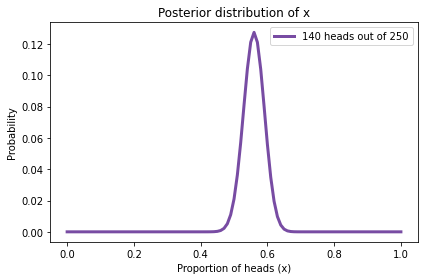

In [38]:
posterior.plot(label='140 heads out of 250', color='C4')
decorate_euro(title='Posterior distribution of x')

This figure shows the posterior distribution of `x`, which is the proportion of heads for the coin we observed.

The posterior distribution represents our beliefs about `x` after seeing the data.
It indicates that values less than 0.4 and greater than 0.7 are unlikely; values between 0.5 and 0.6 are the most likely.

In fact, the most likely value for `x` is 0.56 which is the proportion of heads in the dataset, `140/250`.

该图显示了“x”的后验分布，这是我们观察到的硬币正面的比例。

后验分布代表我们在看到数据后对“x”的看法。
它表明小于 0.4 和大于 0.7 的值不太可能； 0.5 到 0.6 之间的值最有可能。

事实上，“x”最可能的值是 0.56，这是数据集中正面的比例，“140/250”。

In [45]:
posterior.max_prob()

0.56

## Triangle Prior

So far we've been using a uniform prior:

## 三角先验

到目前为止，我们一直在使用统一的先验：

In [46]:
uniform = Pmf(1, hypos, name='uniform')
uniform.normalize()

101

In [47]:
uniform.head()

,probs
0.00,0.009901
0.01,0.009901
0.02,0.009901


But that might not be a reasonable choice based on what we know about coins.
I can believe that if a coin is lopsided, `x` might deviate substantially from 0.5, but it seems unlikely that the Belgian Euro coin is so imbalanced that `x` is 0.1 or 0.9.

It might be more reasonable to choose a prior that gives
higher probability to values of `x` near 0.5 and lower probability
to extreme values.

As an example, let's try a triangle-shaped prior.
Here's the code that constructs it:

但根据我们对硬币的了解，这可能不是一个合理的选择。
我可以相信，如果一枚硬币是不平衡的，“x”可能会大大偏离 0.5，但比利时欧元硬币似乎不太可能如此不平衡以至于“x”是 0.1 或 0.9。

选择给出的先验可能更合理
'x' 值接近 0.5 的概率更高，概率更低
到极值。

例如，让我们尝试一个三角形的先验。
这是构造它的代码：

In [48]:
ramp_up = np.arange(50)
ramp_down = np.arange(50, -1, -1)

a = np.append(ramp_up, ramp_down)

triangle = Pmf(a, hypos, name='triangle')
triangle.normalize()

2500

In [52]:
triangle

,probs
0.00,0.000000e+00
0.01,2.856563e-209
0.02,2.606575e-167
0.03,5.688007e-143
0.04,7.520849e-126
...,...
0.96,1.916921e-84
0.97,1.107834e-97
0.98,1.324197e-116
0.99,2.113001e-149


`arange` returns a NumPy array, so we can use `np.append` to append `ramp_down` to the end of `ramp_up`.
Then we use `a` and `hypos` to make a `Pmf`.

The following figure shows the result, along with the uniform prior.

`arange` 返回一个 NumPy 数组，因此我们可以使用 `np.append` 将 `ramp_down` 附加到 `ramp_up` 的末尾。
然后我们使用 `a` 和 `hypos` 来制作 `Pmf`。

下图显示了结果，以及统一的先验。

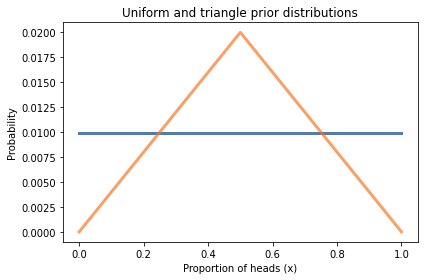

In [49]:
uniform.plot()
triangle.plot()
decorate_euro(title='Uniform and triangle prior distributions')

Now we can update both priors with the same data:

现在我们可以用相同的数据更新两个先验：


In [50]:
update_euro(uniform, dataset)
update_euro(triangle, dataset)

Here are the posteriors.
以下是后验

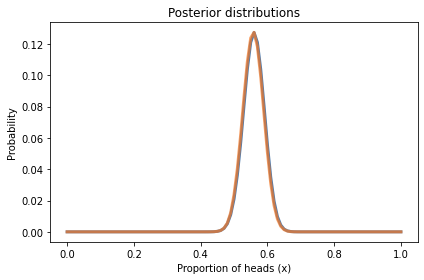

In [51]:
uniform.plot()
triangle.plot()
decorate_euro(title='Posterior distributions')

The differences between the posterior distributions are barely visible, and so small they would hardly matter in practice.

And that's good news.
To see why, imagine two people who disagree angrily about which prior is better, uniform or triangle.
Each of them has reasons for their preference, but neither of them can persuade the other to change their mind.

But suppose they agree to use the data to update their beliefs.
When they compare their posterior distributions, they find that there is almost nothing left to argue about.

This is an example of **swamping the priors**: with enough
data, people who start with different priors will tend to
converge on the same posterior distribution.

后验分布之间的差异几乎不可见，而且非常小，在实践中几乎不重要。

这是个好消息。
要了解原因，请想象两个人对哪个先验更好，统一还是三角形存在愤怒的分歧。
他们每个人都有自己偏爱的理由，但他们都无法说服对方改变主意。

但是假设他们同意使用这些数据来更新他们的信念。
当他们比较他们的后验分布时，他们发现几乎没有什么可争论的。

这是一个**淹没先验**的例子：有足够的
数据，从不同先验开始的人会倾向于
收敛于相同的后验分布。


## The Binomial Likelihood Function

So far we've been computing the updates one spin at a time, so for the Euro problem we have to do 250 updates.

A more efficient alternative is to compute the likelihood of the entire dataset at once.
For each hypothetical value of `x`, we have to compute the probability of getting 140 heads out of 250 spins.

Well, we know how to do that; this is the question the binomial distribution answers.
If the probability of heads is $p$, the probability of $k$ heads in $n$ spins is:

$$\binom{n}{k} p^k (1-p)^{n-k}$$

And we can use SciPy to compute it.
The following function takes a `Pmf` that represents a prior distribution and a tuple of integers that represent the data:

## 二项似然函数

到目前为止，我们一直在计算一次旋转一次的更新，因此对于欧元问题，我们必须进行 250 次更新。

一种更有效的替代方法是一次计算整个数据集的可能性。
对于“x”的每个假设值，我们必须计算在 250 次抛硬币中出现 140 个正面的概率。

好吧，我们知道该怎么做；这是二项分布回答的问题。
如果正面的概率为 $p$，则在 $n$ 次旋转中出现 $k$ 正面的概率为：

$$\binom{n}{k} p^k (1-p)^{n-k}$$

我们可以使用 SciPy 来计算它。
以下函数采用表示先验分布的“Pmf”和表示数据的整数元组：

In [60]:
from scipy.stats import binom

def update_binomial(pmf, data):
    """Update pmf using the binomial distribution."""
    k, n = data
    xs = pmf.qs
    likelihood = binom.pmf(k, n, xs)
    pmf *= likelihood
    pmf.normalize()

The data are represented with a tuple of values for `k` and `n`, rather than a long string of outcomes.
Here's the update.

In [61]:
uniform2 = Pmf(1, hypos, name='uniform2')
data = 140, 250
update_binomial(uniform2, data)

And here's what the posterior looks like.

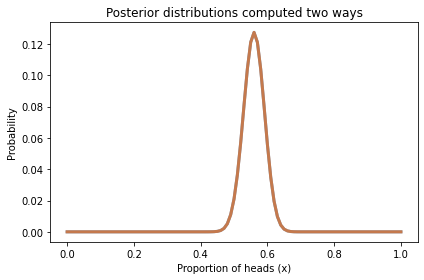

In [62]:
uniform.plot()
uniform2.plot()
decorate_euro(title='Posterior distributions computed two ways')

We can use `allclose` to confirm that the result is the same as in the previous section except for a small floating-point round-off.

我们可以使用 `allclose` 来确认结果与上一节中的结果相同，只是进行了小浮点舍入。

In [63]:
np.allclose(uniform, uniform2)

True

But this way of doing the computation is much more efficient.

但是这种计算方式效率更高。

## Bayesian Statistics

You might have noticed similarities between the Euro problem and the 101 Bowls Problem in <<_101Bowls>>.
The prior distributions are the same, the likelihoods are the same, and with the same data the results would be the same.
But there are two differences.

The first is the choice of the prior.
With 101 bowls, the uniform prior is implied by the statement of the problem, which says that we choose one of the bowls at random with equal probability.

In the Euro problem, the choice of the prior is subjective; that is, reasonable people could disagree, maybe because they have different information about coins or because they interpret the same information differently.

Because the priors are subjective, the posteriors are subjective, too.
And some people find that problematic.

## 贝叶斯统计

您可能已经注意到 <<_101Bowls>> 中的欧元问题和 101 碗问题之间的相似之处。
先验分布相同，可能性相同，并且使用相同的数据，结果将相同。
但是有两个区别。

首先是先验的选择。
对于 101 个碗，问题陈述暗示了统一先验，即我们以相等的概率随机选择其中一个碗。

在欧元问题中，先验的选择是主观的；也就是说，理性的人可能会不同意，可能是因为他们对硬币有不同的信息，或者因为他们对相同信息的解释不同。

因为先验是主观的，所以后验也是主观的。
有些人认为这是有问题的。

The other difference is the nature of what we are estimating.
In the 101 Bowls problem, we choose the bowl randomly, so it is uncontroversial to compute the probability of choosing each bowl.
In the Euro problem, the proportion of heads is a physical property of a given coin.
Under some interpretations of probability, that's a problem because physical properties are not considered random.

As an example, consider the age of the universe.
Currently, our best estimate is 13.80 billion years, but it might be off by 0.02 billion years in either direction (see [here](https://en.wikipedia.org/wiki/Age_of_the_universe)).

Now suppose we would like to know the probability that the age of the universe is actually greater than 13.81 billion years.
Under some interpretations of probability, we would not be able to answer that question.
We would be required to say something like, "The age of the universe is not a random quantity, so it has no probability of exceeding a particular value."

Under the Bayesian interpretation of probability, it is meaningful and useful to treat physical quantities as if they were random and compute probabilities about them.

In the Euro problem, the prior distribution represents what we believe about coins in general and the posterior distribution represents what we believe about a particular coin after seeing the data.
So we can use the posterior distribution to compute probabilities about the coin and its proportion of heads.

另一个区别是我们估计的性质。
在 101 碗问题中，我们随机选择碗，因此计算选择每个碗的概率是没有争议的。
在欧元问题中，正面的比例是给定硬币的物理属性。
根据对概率的一些解释，这是一个问题，因为物理属性不被认为是随机的。

例如，考虑宇宙的年龄。
目前，我们的最佳估计是 138 亿年，但在任一方向上都可能相差 0.2 亿年（参见 [此处](https://en.wikipedia.org/wiki/Age_of_the_universe)）。

现在假设我们想知道宇宙年龄实际上大于 138.1 亿年的概率。
根据对概率的某些解释，我们将无法回答这个问题。
我们会被要求说，“宇宙的年龄不是一个随机量，所以它没有超过特定值的概率。”

在概率的贝叶斯解释下，将物理量视为随机的并计算它们的概率是有意义和有用的。

在欧元问题中，先验分布代表我们对硬币的总体看法，后验分布代表我们在看到数据后对特定硬币的看法。
所以我们可以使用后验分布来计算硬币的概率及其正面的比例。

The subjectivity of the prior and the interpretation of the posterior are key differences between using Bayes's Theorem and doing Bayesian statistics.

Bayes's Theorem is a mathematical law of probability; no reasonable person objects to it.
But Bayesian statistics is surprisingly controversial.
Historically, many people have been bothered by its subjectivity and its use of probability for things that are not random.

If you are interested in this history, I recommend Sharon Bertsch McGrayne's book, *[The Theory That Would Not Die](https://yalebooks.yale.edu/book/9780300188226/theory-would-not-die)*.

先验的主观性和后验的解释是使用贝叶斯定理和进行贝叶斯统计之间的主要区别。

贝叶斯定理是概率的数学定律；没有理智的人反对它。
但贝叶斯统计令人惊讶地有争议。
从历史上看，许多人一直被它的主观性和它对非随机事物的概率使用所困扰。

如果你对这段历史感兴趣，我推荐 Sharon Bertsch McGrayne 的书，*[不会消亡的理论](https://yalebooks.yale.edu/book/9780300188226/theory-would-not-die)*。

## Summary

In this chapter I posed David MacKay's Euro problem and we started to solve it.
Given the data, we computed the posterior distribution for `x`, the probability a Euro coin comes up heads.

We tried two different priors, updated them with the same data, and found that the posteriors were nearly the same.
This is good news, because it suggests that if two people start with different beliefs and see the same data, their beliefs tend to converge.

This chapter introduces the binomial distribution, which we used to compute the posterior distribution more efficiently.
And I discussed the differences between applying Bayes's Theorem, as in the 101 Bowls problem, and doing Bayesian statistics, as in the Euro problem.

However, we still haven't answered MacKay's question: "Do these data give evidence that the coin is biased rather than fair?"
I'm going to leave this question hanging a little longer; we'll come back to it in <<_Testing>>.

In the next chapter, we'll solve problems related to counting, including trains, tanks, and rabbits.

But first you might want to work on these exercises.

## 概括

在本章中，我提出了 David MacKay 的欧元问题，我们开始解决它。
给定数据，我们计算了“x”的后验分布，即欧元硬币正面朝上的概率。

我们尝试了两种不同的先验，用相同的数据更新它们，发现后验几乎相同。
这是个好消息，因为它表明如果两个人从不同的信念开始并看到相同的数据，他们的信念往往会趋同。

本章介绍二项分布，我们用它来更有效地计算后验分布。
我还讨论了应用贝叶斯定理（如 101 碗问题）和进行贝叶斯统计（如欧元问题）之间的区别。

然而，我们仍然没有回答 MacKay 的问题：“这些数据是否证明硬币是有偏见的而不是公平的？”
我将把这个问题搁置一会儿；我们将在 <<_Testing>> 中回到它。

在下一章中，我们将解决与计数相关的问题，包括火车、坦克和兔子。

但首先你可能想要做这些练习。

## Exercises


**Exercise:** In Major League Baseball, most players have a batting average between .200 and .330, which means that their probability of getting a hit is between 0.2 and 0.33.

Suppose a player appearing in their first game gets 3 hits out of 3 attempts.  What is the posterior distribution for their probability of getting a hit?

**锻炼：** 在美国职业棒球大联盟中，大多数球员的平均击球率在 0.200 到 0.330 之间，这意味着他们被击中的概率在 0.2 到 0.33 之间。

假设出现在他们第一场比赛中的球员在 3 次尝试中获得 3 次安打。他们受到打击的概率的后验分布是什么？

For this exercise, I'll construct the prior distribution by starting with a uniform distribution and updating it with imaginary data until it has a shape that reflects my background knowledge of batting averages.

Here's the uniform prior:

在本练习中，我将从均匀分布开始构建先验分布，并使用虚构数据对其进行更新，直到其形状能够反映我对击球率的背景知识。

这是之前的制服：

In [132]:
hypos = np.linspace(0.1, 0.4, 101) # 0.1 to 0.4 ,也就平均0.2到0.3之间
prior = Pmf(1, hypos)

And here is a dictionary of likelihoods, with `Y` for getting a hit and `N` for not getting a hit.

这是一个可能性字典，“Y”表示命中，“N”表示未命中。

In [133]:
likelihood = {
    'Y': hypos,
    'N': 1-hypos
}

Here's a dataset that yields a reasonable prior distribution.

这是一个产生合理先验分布的数据集。

In [134]:
dataset = 'Y' * 25 + 'N' * 75

And here's the update with the imaginary data.

这是虚构数据的更新。

In [135]:
for data in dataset:
    prior *= likelihood[data]

prior.normalize()

1.3596964206970507e-23

Finally, here's what the prior looks like.

最后，这是先验的样子。

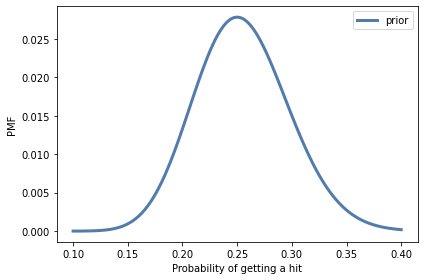

In [136]:
prior.plot(label='prior')
decorate(xlabel='Probability of getting a hit',
         ylabel='PMF')

This distribution indicates that most players have a batting average near 250, with only a few players below 175 or above 350.  I'm not sure how accurately this prior reflects the distribution of batting averages in Major League Baseball, but it is good enough for this exercise.

Now update this distribution with the data and plot the posterior.  What is the most likely quantity in the posterior distribution?

这个分布表明大多数球员的打击率接近 250，只有少数球员低于 175 或高于 350。我不确定这个先验有多准确地反映了美国职业棒球大联盟中的打击率分布，但对于这个练习。

现在用数据更新这个分布并绘制后验图。后验分布中最可能的数量是多少？

In [73]:
# Solution goes here
### 思路
### 在美国职业棒球大联盟中，大多数球员的平均击球率在 0.200 到 0.330 之间，这意味着他们被击中的概率在 0.2 到 0.33 之间。

### 假设出现在他们第一场比赛中的球员在 3 次尝试中获得 3 次安打。他们受到打击的概率的后验分布是什么？

### 首先已经知道了先验分布，然后就要计算似然，如果按照前文的做法就是update_euro(posterior, dataset)

### 那么就只需要构建dataset就行了

### 那么似然如何计算？



In [70]:
dataset2= 'Y' * 3

In [71]:
# Solution goes here
posterior = prior.copy()
update_euro(posterior, dataset2)


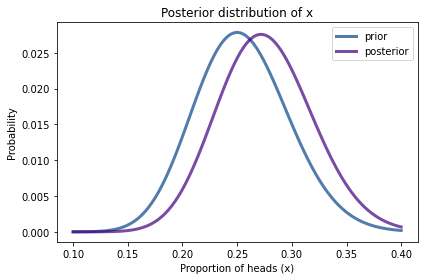

In [72]:
# Solution goes here
prior.plot(label='prior')
posterior.plot(label='posterior', color='C4')
decorate_euro(title='Posterior distribution of x')

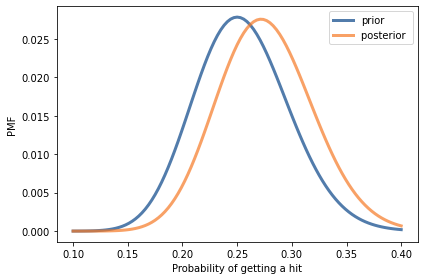

In [137]:
# Solution goes here

### 正确答案

# Solution

posterior = prior.copy()

for data in 'YYY':
    posterior *= likelihood[data]

posterior.normalize()

# Click to hide# Solution

prior.plot(label='prior')
posterior.plot(label='posterior ')
decorate(xlabel='Probability of getting a hit',
         ylabel='PMF')

**Exercise:** Whenever you survey people about sensitive issues, you have to deal with [social desirability bias](https://en.wikipedia.org/wiki/Social_desirability_bias), which is the tendency of people to adjust their answers to show themselves in the most positive light.
One way to improve the accuracy of the results is [randomized response](https://en.wikipedia.org/wiki/Randomized_response).

As an example, suppose you want to know how many people cheat on their taxes.
If you ask them directly, it is likely that some of the cheaters will lie.
You can get a more accurate estimate if you ask them indirectly, like this: Ask each person to flip a coin and, without revealing the outcome,

* If they get heads, they report YES.

* If they get tails, they honestly answer the question "Do you cheat on your taxes?"

If someone says YES, we don't know whether they actually cheat on their taxes; they might have flipped heads.
Knowing this, people might be more willing to answer honestly.

Suppose you survey 100 people this way and get 80 YESes and 20 NOs.  Based on this data, what is the posterior distribution for the fraction of people who cheat on their taxes?  What is the most likely quantity in the posterior distribution?

**练习：** 每当你就敏感问题对人们进行调查时，你必须处理[社会期望偏差](https://en.wikipedia.org/wiki/Social_desirability_bias)，这是人们调整答案的倾向以最积极的方式展现自己。
提高结果准确性的一种方法是[随机响应](https://en.wikipedia.org/wiki/Randomized_response)。

例如，假设您想知道有多少人在税收上作弊。
如果你直接问他们，很可能一些骗子会撒谎。
如果您间接询问他们，您可以获得更准确的估计，例如：要求每个人掷硬币，并且不透露结果，

* 如果他们得到正面，他们报告是。

* 如果他们得到了反面，他们会诚实地回答“你在税收上作弊吗？”这个问题。

如果有人说是，我们不知道他们是否真的在税收上作弊；他们可能已经颠倒了。
知道了这一点，人们可能更愿意诚实地回答。

假设您以这种方式调查 100 人，得到 80 个“是”和 20 个“否”。根据这些数据，偷税者比例的后验分布是什么？后验分布中最可能的数量是多少？

In [138]:
# Solution goes here

hypos = np.linspace(0.1, 1, 101)
prior = Pmf(1, hypos)


In [139]:
# Solution goes here
likelihood = {
    'Y': hypos,
    'N': 1-hypos
}

In [140]:
# Solution goes here
dataset = 'Y' * 50 + 'N' * 50

In [141]:
# Solution goes here
for data in dataset:
    prior *= likelihood[data]

prior.normalize()

1.0903908714431617e-29

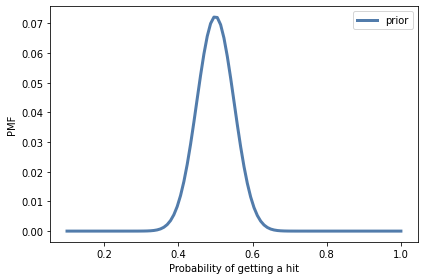

In [142]:
# Solution goes here
prior.plot(label='prior')
decorate(xlabel='Probability of getting a hit',
         ylabel='PMF')

In [143]:
dataset3= 'Y' * 80+ 'N' * 20
posterior = prior.copy()
update_euro(posterior, dataset3)

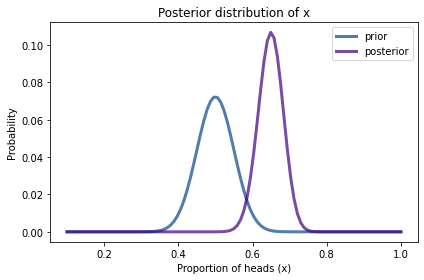

In [144]:
# Solution goes here
prior.plot(label='prior')
posterior.plot(label='posterior', color='C4')
decorate_euro(title='Posterior distribution of x')

In [104]:
posterior.max_prob()*100  ###65个人会作弊？

64.9

In [80]:
prior.max_prob()

0.802

0.6

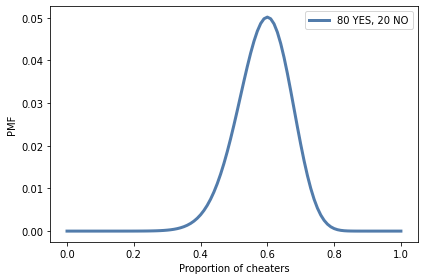

In [146]:
### 正确答辩
# Solution

# I'll use a uniform distribution again, although there might
# be background information we could use to choose a more
# specific prior.

hypos = np.linspace(0, 1, 101)
prior = Pmf(1, hypos)
# Solution

# If the actual fraction of cheaters is `x`, the number of
# YESes is (0.5 + x/2), and the number of NOs is (1-x)/2

likelihood = {
    'Y': 0.5 + hypos/2,
    'N': (1-hypos)/2
}

likelihood

# Solution

dataset = 'Y' * 80 + 'N' * 20

posterior = prior.copy()

for data in dataset:
    posterior *= likelihood[data]

posterior.normalize()

# Solution

posterior.plot(label='80 YES, 20 NO')
decorate(xlabel='Proportion of cheaters',
         ylabel='PMF')

# Solution

posterior.idxmax()

**Exercise:** Suppose you want to test whether a coin is fair, but you don't want to spin it hundreds of times.
So you make a machine that spins the coin automatically and uses computer vision to determine the outcome.

However, you discover that the machine is not always accurate.  Specifically, suppose the probability is `y=0.2` that an actual heads is reported as tails, or actual tails reported as heads.

If we spin a coin 250 times and the machine reports 140 heads, what is the posterior distribution of `x`?
What happens as you vary the value of `y`?

**练习**：假设您想测试一个硬币是否公平，但您不想旋转数百次。
因此，您制造了一台自动旋转硬币并使用计算机视觉来确定结果的机器。

但是，您发现机器并不总是准确的。具体来说，假设实际正面报告为反面或实际反面报告为正面的概率为“y=0.2”。

如果我们将硬币旋转 250 次，机器报告 140 次正面，“x”的后验分布是什么？
当你改变 `y` 的值时会发生什么？

In [149]:

### 我的答案
# Solution goes here
hypos = np.linspace(0.1, 1, 101)
prior = Pmf(0.2, hypos)
prior

,probs
0.100,0.2
0.109,0.2
0.118,0.2
0.127,0.2
0.136,0.2
...,...
0.964,0.2
0.973,0.2
0.982,0.2
0.991,0.2


In [110]:
# Solution goes here

likelihood = {
    'Y': hypos,
    'N': 1-hypos
}


In [118]:
# Solution goes here
dataset = 'Y' * 20 + 'N' * 80

In [119]:
# Solution goes here
for data in dataset:
    prior *= likelihood[data]

prior.normalize()

1.83525016590049e-25

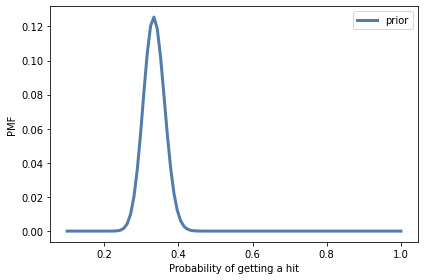

In [120]:
# Solution goes here
prior.plot(label='prior')
decorate(xlabel='Probability of getting a hit',
         ylabel='PMF')

In [121]:
dataset5= 'Y' * 140 + 'N' * 110
posterior = prior.copy()
update_euro(posterior, dataset5)


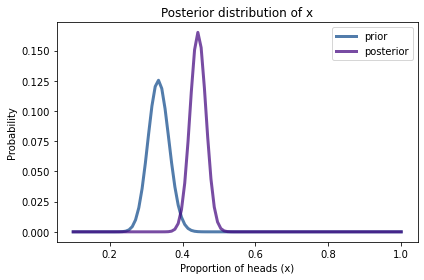

In [122]:
prior.plot(label='prior')
posterior.plot(label='posterior', color='C4')
decorate_euro(title='Posterior distribution of x')

(0.56, 0.6, 0.8)

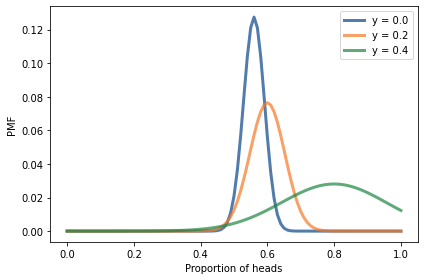

In [148]:
#### 正确答案

# Solution

def update_unreliable(pmf, dataset, y):
    
    likelihood = {
        'H': (1-y) * hypos + y * (1-hypos),
        'T': y * hypos + (1-y) * (1-hypos)
    }
    for data in dataset:
        pmf *= likelihood[data]

    pmf.normalize()

# Solution

hypos = np.linspace(0, 1, 101)
prior = Pmf(1, hypos)
dataset = 'H' * 140 + 'T' * 110

posterior00 = prior.copy()
update_unreliable(posterior00, dataset, 0.0)

posterior02 = prior.copy()
update_unreliable(posterior02, dataset, 0.2)

posterior04 = prior.copy()
update_unreliable(posterior04, dataset, 0.4)

# Solution

posterior00.plot(label='y = 0.0')
posterior02.plot(label='y = 0.2')
posterior04.plot(label='y = 0.4')
decorate(xlabel='Proportion of heads',
         ylabel='PMF')

# Click to hide# Solution

posterior00.idxmax(), posterior02.idxmax(), posterior04.idxmax()

**Exercise:** In preparation for an alien invasion, the Earth Defense League (EDL) has been working on new missiles to shoot down space invaders.  Of course, some missile designs are better than others; let's assume that each design has some probability of hitting an alien ship, `x`.

Based on previous tests, the distribution of `x` in the population of designs is approximately uniform between 0.1 and 0.4.

Now suppose the new ultra-secret Alien Blaster 9000 is being tested.  In a press conference, an EDL general reports that the new design has been tested twice, taking two shots during each test.  The results of the test are confidential, so the general won't say how many targets were hit, but they report: "The same number of targets were hit in the two tests, so we have reason to think this new design is consistent."

Is this data good or bad? 
That is, does it increase or decrease your estimate of `x` for the Alien Blaster 9000?

**练习：** 为准备外星人入侵，地球防御联盟 (EDL) 一直在研制新导弹以击落太空入侵者。当然，有些导弹的设计比其他的要好；让我们假设每个设计都有一定的概率击中外星飞船“x”。

根据之前的测试，“x”在设计总体中的分布大致均匀，介于 0.1 和 0.4 之间。

现在假设正在测试新的超机密 Alien Blaster 9000。在新闻发布会上，一位 EDL 将军报告说，新设计已经过两次测试，每次测试拍摄两次。测试结果是保密的，所以将军不会说击中了多少目标，但他们报告说：“两次测试中击中的目标数量相同，所以我们有理由认为这个新设计是一致的。 "

这个数据是好是坏？
也就是说，它会增加还是减少您对 Alien Blaster 9000 的估计值？

Hint: If the probability of hitting each target is $x$, the probability of hitting one target in both tests
is $\left[2x(1-x)\right]^2$.

提示：如果击中每个目标的概率为 $x$，则在两个测试中击中一个目标的概率
是 $\left[2x(1-x)\right]^2$。

$$\binom{n}{k} p^k (1-p)^{n-k}$$

In [124]:
# Solution goes here
hypos = np.linspace(0.1, 0.4, 101)
prior = Pmf(1, hypos)

In [55]:
# Solution goes here
likelihood = {
    'Y': hypos,
    'N': 1-hypos
}

In [125]:
# Solution goes here
dataset = 'Y' * 20 + 'N' * 80

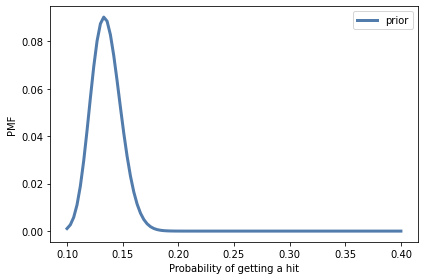

In [126]:
# Solution goes here
# Solution goes here
for data in dataset:
    prior *= likelihood[data]

prior.normalize()

# Solution goes here
prior.plot(label='prior')
decorate(xlabel='Probability of getting a hit',
         ylabel='PMF')

In [127]:
# Solution goes here
dataset7= 'Y' * 2
posterior = prior.copy()
update_euro(posterior, dataset7)


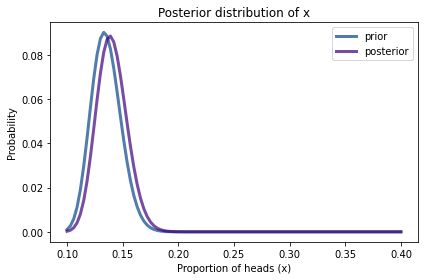

In [129]:
# Solution goes here
prior.plot(label='prior')
posterior.plot(label='posterior', color='C4')
decorate_euro(title='Posterior distribution of x')

In [163]:
# Solution goes here# Solution
### 正确答案
hypos = np.linspace(0.1, 0.4, 101)
prior = Pmf(1, hypos)
# Solution

# Here's a specific version for n=2 shots per test

x = hypos
likes = [(1-x)**4, (2*x*(1-x))**2, x**4]
likelihood = np.sum(likes, axis=0)  ##把三个列表加起来

len(likes)

3

In [164]:
likes

[array([0.6561    , 0.64739564, 0.63877818, 0.63024704, 0.62180164,
        0.6134414 , 0.60516575, 0.59697411, 0.58886593, 0.58084061,
        0.57289761, 0.56503635, 0.55725628, 0.54955683, 0.54193743,
        0.53439755, 0.52693662, 0.51955408, 0.51224939, 0.505022  ,
        0.49787136, 0.49079692, 0.48379815, 0.47687449, 0.47002542,
        0.46325039, 0.45654887, 0.44992032, 0.44336421, 0.43688002,
        0.43046721, 0.42412526, 0.41785365, 0.41165184, 0.40551933,
        0.3994556 , 0.39346013, 0.3875324 , 0.3816719 , 0.37587812,
        0.37015056, 0.36448871, 0.35889205, 0.3533601 , 0.34789235,
        0.3424883 , 0.33714745, 0.33186932, 0.3266534 , 0.32149921,
        0.31640625, 0.31137404, 0.3064021 , 0.30148994, 0.29663709,
        0.29184305, 0.28710736, 0.28242954, 0.27780911, 0.27324561,
        0.26873856, 0.2642875 , 0.25989196, 0.25555148, 0.2512656 ,
        0.24703385, 0.24285578, 0.23873094, 0.23465886, 0.2306391 ,
        0.22667121, 0.22275474, 0.21888924, 0.21

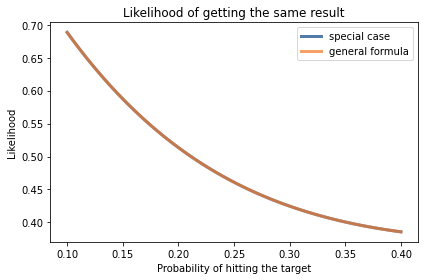

In [165]:

# Here's a more general version for any n shots per test

from scipy.stats import binom

n = 2
likes2 = [binom.pmf(k, n, x)**2 for k in range(n+1)]
likelihood2 = np.sum(likes2, axis=0)
# Solution

# Here are the likelihoods, computed both ways

import matplotlib.pyplot as plt

plt.plot(x, likelihood, label='special case')
plt.plot(x, likelihood2, label='general formula')
decorate(xlabel='Probability of hitting the target',
         ylabel='Likelihood',
         title='Likelihood of getting the same result')



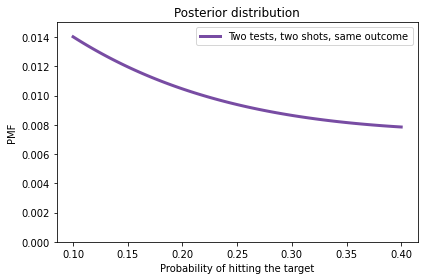

In [153]:
# Click to hide# Solution
# Click to hide# Solution

posterior = prior * likelihood
posterior.normalize()
posterior.plot(label='Two tests, two shots, same outcome',
               color='C4')
decorate(xlabel='Probability of hitting the target',
         ylabel='PMF',
         title='Posterior distribution',
         ylim=[0, 0.015])

In [167]:
# Solution

# Getting the same result in both tests is more likely for 
# extreme values of `x` and least likely when `x=0.5`.

# In this example, the prior indicates that `x` is less than 0.5,
# and the update gives more weight to extreme values.

# So the dataset makes lower values of `x` more likely.

# 解决方案

# 在两个测试中获得相同结果的可能性更大
# `x` 的极值，当 `x=0.5` 时最不可能。

# 在这个例子中，先验表明`x`小于0.5，
# 并且更新赋予了极值更多的权重。

# 所以数据集使得 `x` 的值越低越有可能。